In [24]:
#Welcome to my project!
#I had a lot of fun with this; Thank you Brainstation!

In [ ]:
pip install selenium

In [ ]:
#I created a comment scraper that would scrape the comments of a given movie.

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from selenium.common.exceptions import TimeoutException,ElementClickInterceptedException

#Make two lists to extract both the comments and titles of reviews.
comment2 = []
title = []

#Put the URL here. It was important to me to make sure that the setting was on ascending.
URL = "https://www.imdb.com/title/tt6139732/reviews?sort=submissionDate&dir=asc&ratingFilter=0" 

#Call Chromedriver and wait for the website for 10 seconds for it to load.
driver = webdriver.Chrome(r'C:\Users\surba\Desktop\chromedriver.exe')
wait = WebDriverWait(driver,10)
driver.get(URL)
soup = BeautifulSoup(driver.page_source, 'lxml')


#Locate and click button to scroll down.
#Continue this until button is no longer present in the DOM or if there is a malfunction/

while True:
    try:
        driver.find_element_by_css_selector("button#load-more-trigger").click()
        wait.until(EC.invisibility_of_element_located((By.CSS_SELECTOR,".ipl-load-more__load-indicator")))
        extract = BeautifulSoup(driver.page_source, 'lxml')

    except Exception:
        break
        
#Extract all titles and full reviews, then append to list
for i in extract.find_all(class_='imdb-user-review'):
            name = i.find(class_='title').get_text(strip=True)
            comment = i.find(class_='content').get_text(strip=True)
            comment2.append(comment)
            title.append(name)

            

#Put spaces between each title and review, and print them all out in output.
#Quit driver.
finals ='\n\n'.join(title)
final = '\n\n'.join(comment2)
print(final)
print(finals)
driver.quit()

#NOTE; If your link has lots of comments, this may take a while. So just sit back and relax 8)

In [ ]:
#I am now going to build a model to analyze the sentiment of these comments.

import pandas as pd
import numpy as np
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import KFold
from textblob import TextBlob,Word


#I downloaded a kaggle dataset that attributed positive or negative to over random IMDB comments.
#Here is the link ; https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?select=IMDB+Dataset.csv 

IMDB = pd.read_csv('IMDB Dataset.csv')
#comment = comment.dropna(subset=['review'],axis=0)
#IMDB.index.names = [None]

english_stop_words = ENGLISH_STOP_WORDS

#We will be using the snowball stemmer to get rid of symbols, stopwords, and digits, since these aren't really
#helpful in understanding the difference between a positive and negative comment.
stemmer = SnowballStemmer("english")

def to_lower(corpus):
    return [' '.join([word.lower() for word in comment.split(' ')]) for comment in corpus]

def remove_symbols(corpus):
    corpus = re.sub(r'\W+', ' ',corpus)
    corpus = re.sub(" \d+", " ", corpus)
    corpus = re.sub(' s ', ' ',corpus)
    corpus = re.sub(' ve ', ' ',corpus)
    corpus = re.sub(' m ', ' ',corpus)
    corpus = re.sub(' t ', ' ',corpus)
    return corpus

def stemmed(corpus):
    return [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in corpus]


def remove(corpus):
    removed = []
    for comment in corpus:
        removed.append(' '.join([word for word in comment.split(' ') if word not in english_stop_words]))
    
    return removed
                       
IMDB['clean'] = to_lower(IMDB['review'])
IMDB['clean'] = IMDB['clean'].apply(lambda x:remove_symbols(x))
IMDB['clean'] = remove(IMDB['clean'])
IMDB['clean'] = stemmed(IMDB['clean'])

#print(IMDB['clean'].iloc[40:100])

#then make it to a new CSV.
IMDB.to_csv('IMDB1.csv')

In [1]:
#This is the model that I used to analyze the sentiments of the IMDB

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,SGDClassifier,LinearRegression 
from sklearn.feature_extraction import text
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier




IMDB = pd.read_csv('IMDB1.csv')

#Split testing and training parts into ten parts, and shuffle them.
kf10 = KFold(n_splits=10,shuffle=True)


#____________

#set dependent and independent variable.
y=IMDB['sentiment']
X = IMDB['clean']

#The SGDClassifier worked the best.
model = SGDClassifier()

#Create BOW to tokenize words.
bagger = text.TfidfVectorizer()

#Fit transfom reviews then see accuracy score!
for train_index,test_index in kf10.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train=bagger.fit_transform(X_train)
    X_test = bagger.transform(X_test)
    
    model.fit(X_train,y_train)
    
    #predict = model.predict(X_test)
    #scores.append(model.score(X_test,y_test))
    print(model.score(X_test,y_test))
#prints accuracy score
#lr_score=accuracy_score(test_sentiment,lr_predict)
#print(lr_score)



#You can also see the classification report here, as well as confusion matrix! :) 

#lr_report = classification_report(test_sentiment,lr_predict)
#print(lr_report)

#lr_confusion = confusion_matrix(test_sentiment,lr_predict)
#print(lr_confusion)


0.8868
0.8962
0.8934
0.8914
0.8968
0.883
0.8838
0.8912
0.883
0.8932


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,SGDClassifier,LinearRegression 
from sklearn.feature_extraction import text
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier



#Great! Now we can use this to analyze our corpus.


#Here I analyzed the titles from Aladdin's reviews.
#I simply copied all of the output from before and put it into a text file.

data = [line.strip() for line in open('aladdin_title.txt',encoding='utf-8')]

#Repeat process of stemming and removing unnecessary parts of text.
def remove_symbols(corpus):
    corpus = re.sub(r'\W+', ' ',corpus)
    corpus = re.sub(" \d+", " ", corpus)
    corpus = re.sub(' s ', ' ',corpus)
    corpus = re.sub(' ve ', ' ',corpus)
    corpus = re.sub(' m ', ' ',corpus)
    corpus = re.sub(' t ', ' ',corpus)
    return corpus


stt = [[words for words in sentences.lower().split()] for sentences in data]
stt= [' '.join([stemmer.stem(word) for word in sentences.split()]) for sentences in data]]
stt = stt.apply(lambda x:remove_symbols(x))
for comment in stt:
    return [' '.join([word for word in comment.split(' ') if word not in english_stop_words]))
stt = [' '.join(x) for x in stt]




bagged = bagger.transform(stt)
bagged.shape

ex = lr.predict(bagged) #Use this to get back all probabilities. This gives you back whether the comment is in Class 1 or 0.

r=lr.predict_proba(bagged)[:,1] #This gives you back specific probabilites.
print(r)
print(ex)
print(np.mean(r))
print(np.mean(ex))

In [5]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


[0.02392489400363423, 2.0216535433070923, 5.347213809812251, 1.1244700181708087, 0.0, 0.09569957601453692, 4.330405814657795, 7.978952150212016, 12.596153846153847, 2.423076923076923, 9.442307692307692, 4.615384615384615, 0.057692307692307696, 0.2692307692307692, 0.1346153846153846]


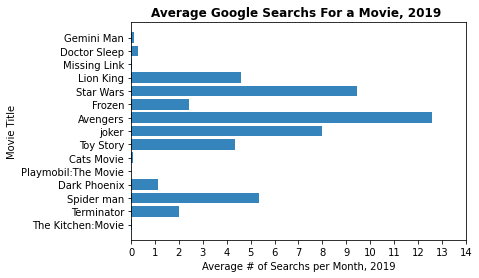

In [6]:
#I also wanted to see how frequently a movie is googled on the web.
#I installed pytrends to get this data, and worked to normalize the data since it gives you relative data.

import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#Pick a movie to put in both lists that will be used to calculate the normalization factor.
#In this case it is Star Wars.
list1=['Star Wars','The Kitchen:Movie','Terminator','Spider man','Dark Phoenix']
list2 = ['Star Wars','Playmobil:The Movie','Cats Movie','Toy Story','joker']

#I looked at the data only in the US
pytrends1 = TrendReq(hl='en-US',tz=360)
pytrends2 = TrendReq(hl='en-US',tz=360)

#Timeframe is set to look at the whole year; Downside of this is that it may not be representative of how much a movie is searched
#During its opening week.
#That being said most of them tend to only peak once and that is during the opening week.

#The cat at the end is to set the category we are looking at to Arts & Entertainment; This is important since some movies 
#, such as Cats, are also animal names and thus without the categorization may lead us to have an innacurate representation
#of how many people are looking for the Cats Movie.

pytrends1.build_payload(list1,timeframe='2019-01-01 2019-12-30',cat=3)
pytrends2.build_payload(list2,timeframe='2019-01-01 2019-12-30',cat=3)
df1 = pytrends1.interest_over_time()
df2= pytrends2.interest_over_time()
averageList1=[]
averageList2=[]

#I then took the mean of each item in list.
for item in list1:
    averageList1.append(df1[item].mean())
for item in list2:
    averageList2.append(df2[item].mean())

#print(averageList1)
#print(averageList2)

#I had 16 movies I wanted to analyze so I repeated this process.
list3=['Avengers','Frozen','Star Wars']
list4 = ['Avengers','Lion King','Missing Link','Doctor Sleep','Gemini Man']
pytrends3 = TrendReq(hl='en-US',tz=360)
pytrends4 = TrendReq(hl='en-US',tz=360)
#I set cat as 3, so that the category that we're looking for these 
#terms is under arts and entertainement.

#The timeframe is also set between January 1st to December 30th.
pytrends3.build_payload(list3,timeframe='2019-01-01 2019-12-30',cat=3)
pytrends4.build_payload(list4,timeframe='2019-01-01 2019-12-30',cat=3)

df3 = pytrends3.interest_over_time()
df4= pytrends4.interest_over_time()
averageList3=[]
averageList4=[]
for item in list3:
    averageList3.append(df3[item].mean())
for item in list4:
    averageList4.append(df4[item].mean())
#print(averageList3)
#print(averageList4)


#star wars 19.538, 12.1538; Normalization Factor is 0.62204724409449.
normalizationFactor1=0.62204724409449
normalization = averageList1[0]*normalizationFactor1
for i in range(len(averageList1)):
    normalisedVal=normalizationFactor1*averageList1[i]
    averageList1[i]=normalisedVal
for i in range(len(averageList2)):
    normalisedVal=normalizationFactor1*averageList2[i]
    averageList2[i]=normalisedVal

#Pop out all repeated movies.
averageList1.pop(0)
averageList2.pop(0)
averageList4.pop(0)
list1.pop(0)
list2.pop(0)
list4.pop(0)

#I print the final list for all of the normalized numbers of each movie that I then used for analysis.
#I then added these to my dataframe.
finallist = averageList1+averageList2+averageList3+averageList4
print(finallist)
list5 = list1+list2+list3+list4
#print(list5)
#averagelist5 = averageList1+averageList2+averageList3+averageList4
#'The Kitchen:Movie','Terminator','Spider man','Dark Phoenix','Playmobil:The Movie','Cats Movie'
#'Avengers','Star Wars','frozen','Joker','Toy Story','Lion King','Missing Link','Doctor Sleep','Gemini Man'
#print(averagelist5)


#Created a simple bar chart to visualize results.
import numpy as np
import matplotlib.pyplot as plt

y_pos=np.arange(len(finallist))

plt.barh(y_pos,(finallist),align='center',alpha=0.9)
plt.yticks(y_pos,list5)
plt.xticks(range(0,15,1))
plt.xlabel('Average # of Searchs per Month, 2019')
plt.ylabel('Movie Title')
plt.title('Average Google Searchs For a Movie, 2019 ',fontweight='bold')
plt.show()


    

In [4]:
#Next I wanted to understand correlations, so I looked at Pearson coefficients.

import pandas as pd
import seaborn as sns;
movie = pd.read_csv('movies2019.csv')
movie = movie.drop(['Number of Trailers (Over a Million)','Release Date','Title','Success Level','Trailer Relase', 'Date of Pique','Pique (Relative to Avengers)'], axis = 1)
movie = movie.dropna(axis=0)
movie.corr()

#Strong Correlations; 
    #Views (In Million), Average # of Searches (85.9%),Number of Household Names (76.2%)
#Medium correlations;
    #Like-to-Dislike Ratio (70.4%).
    


,Earning to Cost Ratio,(Average) Days Trailer(s) was Released Before In Theaters,Like-to-Dislike Ratio,Views (In Million),Total Box Office,# of Household Names,Average # of Searches,Average IMDB Sentiment Score
Earning to Cost Ratio,1.000000,-0.126109,0.464090,0.698866,0.484841,0.158510,0.655561,0.766572
(Average) Days Trailer(s) was Released Before In Theaters,-0.126109,1.000000,-0.250802,-0.018670,0.020148,-0.276588,-0.118824,0.309901
Like-to-Dislike Ratio,0.464090,-0.250802,1.000000,0.733737,0.704765,0.644276,0.611169,0.299203
Views (In Million),0.698866,-0.018670,0.733737,1.000000,0.948229,0.626534,0.856305,0.591906
Total Box Office,0.484841,0.020148,0.704765,0.948229,1.000000,0.761917,0.859918,0.426952
# of Household Names,0.158510,-0.276588,0.644276,0.626534,0.761917,1.000000,0.710346,0.008491
Average # of Searches,0.655561,-0.118824,0.611169,0.856305,0.859918,0.710346,1.000000,0.468165
Average IMDB Sentiment Score,0.766572,0.309901,0.299203,0.591906,0.426952,0.008491,0.468165,1.000000


<AxesSubplot:>

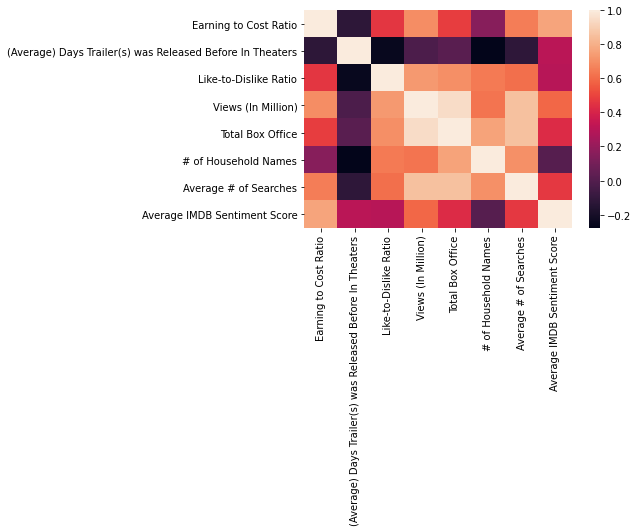

In [6]:
#And a visual :~)
import pandas as pd
import seaborn as sns;
movie = pd.read_csv('movies2019.csv')
movie = movie.drop(['Number of Trailers (Over a Million)','Release Date','Title','Success Level','Trailer Relase', 'Date of Pique','Pique (Relative to Avengers)'], axis = 1)
movie = movie.dropna(axis=0)
movie['Average # of Searches'] = movie['Average # of Searches'].astype('float64')
#movie.dtypes
sns.heatmap(movie.corr())
#sns.pairplot(movie)

In [10]:
#I then deduced that it may be best to just use views to get a good accuracy score.

import pandas as pd
import seaborn as sns;
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

from sklearn import model_selection, metrics



movie = pd.read_csv('test.csv',index_col=0,squeeze=False)
movie = movie.drop(['Extreme','Earning to Cost Ratio','# of Household Names','Like-to-Dislike Ratio','Pique (Relative to Avengers)','(Average) Days Trailer(s) was Released Before In Theaters','Number of Trailers (Over a Million)'], axis = 1)
movie = movie.dropna(axis=0)
movie = movie.astype('int64')
movie['Average IMDB Sentiment Score']=movie['Average IMDB Sentiment Score'].astype('int64')
#movie['Average IMDB Sentiment Score']=movie['Average IMDB Sentiment Score']*100

movie=movie.reset_index()
movie
model = smf.ols("Q('Total Box Office')~ Views + Q('Average IMDB Sentiment Score') ",data=movie).fit()
model.summary()
new_movies = pd.DataFrame({'Title':['The Lighthouse','Apollo 11','The Farewell','Marriage Story','Parasite','Uncut Gems','Pain and Glory','Jumanji','Aladdin'],
                        'Views': [15.076033,2.030398,4.768432,11.427189,29.932772,14.465348,4.121642,117.518994,139.440407], 
                        'Average Number of Searches': [2.442307692,1.153846154,2.123745819,1.805183946,6.477424749,0.730769231,0.403846154,13.88461538,98.11705686],
                             'Average IMDB Sentiment Score':[(55.05),(61),(61),(60),(61.55),
                                                             (55),
                                                                    (58.97),(58.6689),(61.1)],
                          'Actual':[18.3,11.97,22.5,2.3,264.4,50.02,37.36,800.1,1051]})

new_movies['Average Number of Searches'] = new_movies['Average Number of Searches'].astype('int64')
new_movies['Average IMDB Sentiment Score'] = new_movies['Average IMDB Sentiment Score'].astype('float64')
new_movies['Views'] = new_movies['Views'].astype('int64')
new_movies['predicted']=abs(model.predict(new_movies))
new_movies

C:\Users\surba\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\surba\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\surba\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


,Title,Views,Average Number of Searches,Average IMDB Sentiment Score,Actual,predicted
0,The Lighthouse,15,2,55.0500,18.30,75.110854
1,Apollo 11,2,1,61.0000,11.97,28.481222
2,The Farewell,4,2,61.0000,22.50,12.543979
3,Marriage Story,11,1,60.0000,2.30,43.236369
4,Parasite,29,6,61.5500,264.40,186.671550
5,Uncut Gems,14,0,55.0000,50.02,67.142233
6,Pain and Glory,4,0,58.9700,37.36,12.543979
7,Jumanji,117,13,58.6689,800.10,887.910216
8,Aladdin,139,98,61.1000,1051.00,1063.219882


In [ ]:
#The model is not perfect but it demonstrates that simply looking at the number of views of trailers is most 
#indicative of how well a movie will do in the box office.
# Thank you ! :) 